<a href="https://colab.research.google.com/github/vidhu9137/Analysis-of-pipeline-disasters/blob/main/Disasters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Disasters.csv.csv')

In [ ]:
df

Report Number  Supplemental Number  Accident Year  Accident Date/Time  \
0          20100016                17305           2010         1/1/10 7:15   
1          20100254                17331           2010         4/1/10 8:30   
2          20100038                17747           2010        5/1/10 10:30   
3          20100260                18574           2010        6/1/10 19:30   
4          20100030                16276           2010        7/1/10 13:00   
...             ...                  ...            ...                 ...   
2790       20170015                22020           2016  12/27/2016 8:40 AM   
2791       20170028                22046           2016  12/28/2016 4:20 PM   
2792       20170027                22045           2016  12/29/2016 6:40 AM   
2793       20170024                22032           2017        3/1/17 10:00   
2794       20170025                22040           2017         9/1/17 7:40   

      Operator ID                         Operator Name  \
0           32109                 ONEOK NGL PIPELINE LP   
1           15786                PORTLAND PIPELINE CORP   
2           20160           PETROLOGISTICS OLEFINS, LLC   
3           11169  ENBRIDGE ENERGY, LIMITED PARTNERSHIP   
4             300                 PLAINS PIPELINE, L.P.   
...           ...                                   ...   
2790        32334        TC OIL PIPELINE OPERATIONS INC   
2791         4906                EXXONMOBIL PIPELINE CO   
2792        39145     ENBRIDGE STORAGE (CUSHING) L.L.C.   
2793        32147                MARATHON PIPE LINE LLC   
2794        30829         ENTERPRISE CRUDE PIPELINE LLC   

                        Pipeline/Facility Name Pipeline Location  \
0                            KINDER MORGAN JCT           ONSHORE   
1                            24-INCH MAIN LINE           ONSHORE   
2                                          NaN           ONSHORE   
3                            SUPERIOR TERMINAL           ONSHORE   
4                               RED RIVER EAST           ONSHORE   
...                                        ...               ...   
2790                                  KEYSTONE           ONSHORE   
2791  BRRF - CHOCTAW ETHANE/PROPANE MIX SYSTEM           ONSHORE   
2792                  CUSHING CENTRAL TERMINAL           ONSHORE   
2793                           MIDLAND STATION           ONSHORE   
2794                          MARSHALL STATION           ONSHORE   

     Pipeline Type                                        Liquid Type  ...  \
0      ABOVEGROUND         HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS  ...   
1      ABOVEGROUND                                          CRUDE OIL  ...   
2      ABOVEGROUND         HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS  ...   
3      UNDERGROUND                                          CRUDE OIL  ...   
4      UNDERGROUND                                          CRUDE OIL  ...   
...            ...                                                ...  ...   
2790   ABOVEGROUND                                          CRUDE OIL  ...   
2791   UNDERGROUND         HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS  ...   
2792          TANK                                          CRUDE OIL  ...   
2793   UNDERGROUND  REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...  ...   
2794   ABOVEGROUND                                          CRUDE OIL  ...   

     Other Fatalities Public Fatalities All Fatalities Property Damage Costs  \
0                 NaN               NaN            NaN                 110.0   
1                 NaN               NaN            NaN                4000.0   
2                 NaN               NaN            NaN                   0.0   
3                 NaN               NaN            NaN                 200.0   
4                 NaN               NaN            NaN               20000.0   
...               ...               ...            ...                   ...   
2790              NaN             

In [ ]:
((df.isnull().sum())/(len(df))*100).sort_values(ascending = False)

All Fatalities                          99.713775
Operator Employee Fatalities            99.713775
Operator Contractor Fatalities          99.713775
Emergency Responder Fatalities          99.713775
Other Fatalities                        99.713775
Public Fatalities                       99.713775
Emergency Responder Injuries            99.570662
Operator Employee Injuries              99.570662
Other Injuries                          99.570662
Public Injuries                         99.570662
All Injuries                            99.570662
Operator Contractor Injuries            99.570662
Liquid Name                             92.057245
Intentional Release (Barrels)           56.744186
Restart Date/Time                       52.021467
Liquid Subtype                          51.735242
Shutdown Date/Time                      50.268336
Public Evacuations                      16.350626
Accident City                           11.270125
Pipeline Shutdown                        7.584973


In [ ]:
df.columns

Index(['Report Number', 'Supplemental Number', 'Accident Year',
       'Accident Date/Time', 'Operator ID', 'Operator Name',
       'Pipeline/Facility Name', 'Pipeline Location', 'Pipeline Type',
       'Liquid Type', 'Liquid Subtype', 'Liquid Name', 'Accident City',
       'Accident County', 'Accident State', 'Accident Latitude',
       'Accident Longitude', 'Cause Category', 'Cause Subcategory',
       'Unintentional Release (Barrels)', 'Intentional Release (Barrels)',
       'Liquid Recovery (Barrels)', 'Net Loss (Barrels)', 'Liquid Ignition',
       'Liquid Explosion', 'Pipeline Shutdown', 'Shutdown Date/Time',
       'Restart Date/Time', 'Public Evacuations', 'Operator Employee Injuries',
       'Operator Contractor Injuries', 'Emergency Responder Injuries',
       'Other Injuries', 'Public Injuries', 'All Injuries',
       'Operator Employee Fatalities', 'Operator Contractor Fatalities',
       'Emergency Responder Fatalities', 'Other Fatalities',
       'Public Fatalities', 'All

Dropping unnecessary columns

In [ ]:
df = df.drop(columns = ['Accident County', 'Pipeline/Facility Name'])

Dropping null>50 coulmns

In [ ]:
df = df.drop(columns = ['Operator Employee Fatalities', 'Operator Contractor Fatalities', 'Emergency Responder Fatalities', 'Other Fatalities', 'Public Fatalities', 'All Fatalities', 'Operator Employee Injuries', 'Operator Contractor Injuries', 'Emergency Responder Injuries', 'Other Injuries', 'Public Injuries', 'All Injuries', 'Liquid Name', 'Intentional Release (Barrels)', 'Restart Date/Time', 'Liquid Subtype', 'Shutdown Date/Time'])


Filling mean in place of null

In [ ]:
df['Lost Commodity Costs'].fillna(value = df['Lost Commodity Costs'].mean(), inplace=True)
df['Emergency Response Costs'].fillna(value = df['Emergency Response Costs'].mean(), inplace=True)
df['Property Damage Costs'].fillna(value = df['Property Damage Costs'].mean(), inplace=True)
df['Environmental Remediation Costs'].fillna(value = df['Environmental Remediation Costs'].mean(), inplace=True)
df['Public/Private Property Damage Costs'].fillna(value = df['Public/Private Property Damage Costs'].mean(), inplace=True)
df['Other Costs'].fillna(value = df['Other Costs'].mean(), inplace=True)

In [ ]:
((df.isnull().sum())/(len(df))*100).sort_values(ascending = False)

Public Evacuations                      16.350626
Accident City                           11.270125
Pipeline Shutdown                        7.584973
Pipeline Type                            0.644007
Accident State                           0.429338
Report Number                            0.000000
Liquid Recovery (Barrels)                0.000000
Other Costs                              0.000000
Environmental Remediation Costs          0.000000
Emergency Response Costs                 0.000000
Public/Private Property Damage Costs     0.000000
Lost Commodity Costs                     0.000000
Property Damage Costs                    0.000000
Liquid Explosion                         0.000000
Liquid Ignition                          0.000000
Net Loss (Barrels)                       0.000000
Cause Subcategory                        0.000000
Unintentional Release (Barrels)          0.000000
Supplemental Number                      0.000000
Cause Category                           0.000000


Managing the reamining dataset

1. Ignore Null values of Accident city and state
2. Assume No public evacuation took place for null values


In [ ]:
df = df.fillna({'Public Evacuation':0})

3. Fill Pipeline Type to be seabed

In [ ]:
df['Pipeline Location'].unique()

array(['ONSHORE', 'OFFSHORE'], dtype=object)

In [ ]:
df['Pipeline Type'].unique()

array(['ABOVEGROUND', 'UNDERGROUND', 'TANK', nan, 'TRANSITION AREA'],
      dtype=object)

In [ ]:
df = df.fillna({'Pipeline Type': 'SEABED'})

4. Ignore null values of pipeline shut-in because no trend is observed in that.

Take some info out from it

In [ ]:
df['All Costs'].isnull().sum()

0

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

Try to get som einfo from this

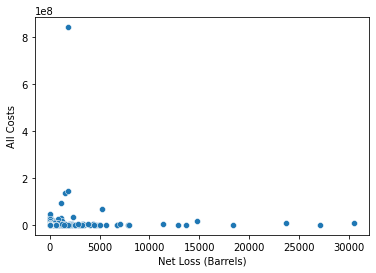

In [ ]:
sns.scatterplot(x = 'Net Loss (Barrels)', y = 'All Costs', data = df)

OBS:ASK?

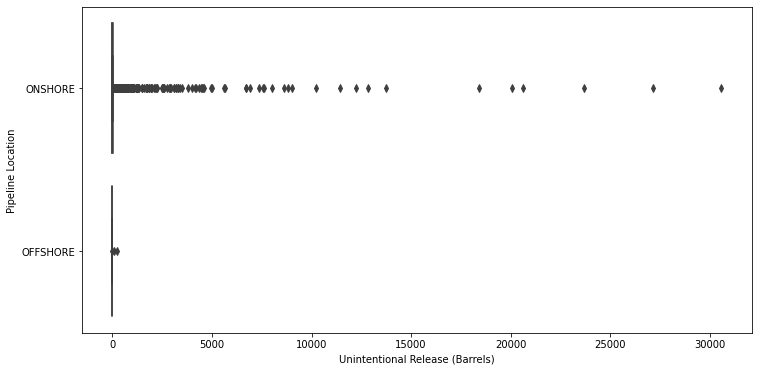

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'Unintentional Release (Barrels)', y = 'Pipeline Location',  data = df)

OBS: Pipeline at offshore has not spilled any liquid.Indicates higher safety/working instruments

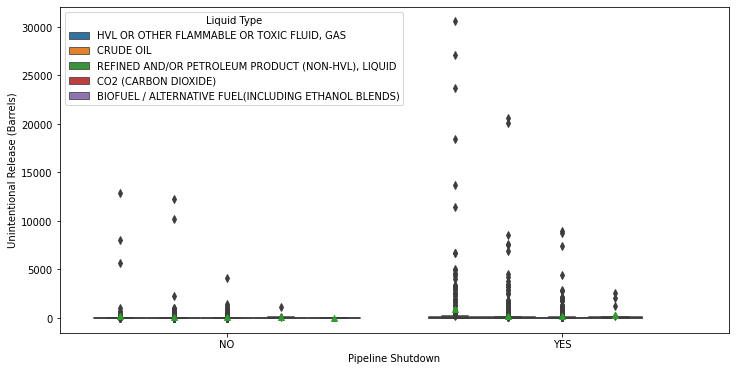

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'Pipeline Shutdown', y = 'Unintentional Release (Barrels)', showmeans = True,  data = df, hue ='Liquid Type')

OBS: ASK

In [ ]:
df['Unintentional Release (Barrels)'].isnull().sum()

0

Plotting and extracting necessary information from data

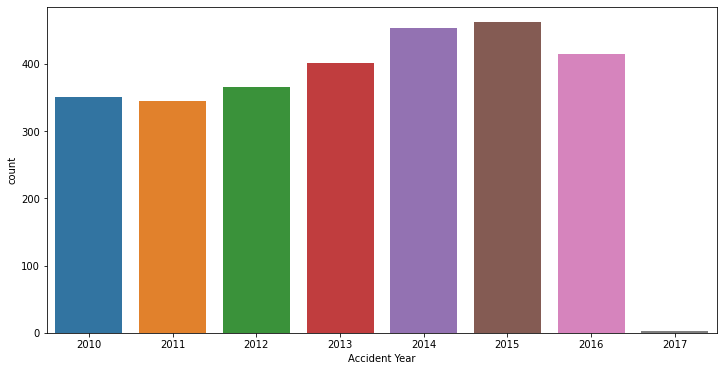

In [ ]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Accident Year', data = df)

OBS: Count of accidents is increasing 

Plotting locations of accidents

In [ ]:
import folium 

In [ ]:
folium.Map()

In [ ]:
list = df[['Accident Latitude', 'Accident Longitude']].values.tolist()
list

In [ ]:
fg = folium.FeatureGroup(name = 'df')
map = folium.Map(location =[38.6707, -97.78123], zoom_start = 1)

for i in list:
  fg.add_child(folium.Marker(location = [i[0], i[1]], icon = folium.Icon(color = 'green')))
map.add_child(fg)

OBS: Most major pipeline accidents occured in US, Alaska and China

Plotting time scale of barrels lost

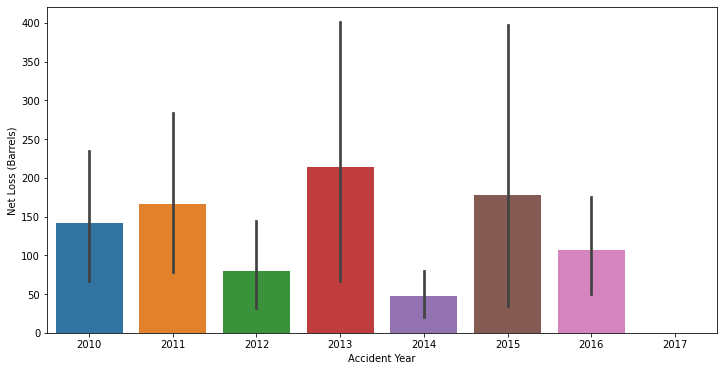

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Accident Year', y = 'Net Loss (Barrels)', data = df)

OBS: Max liq lost-2013, Min liquid lost-2014 Trend is increasing then decreasing 

In [ ]:
df['Net Loss (Barrels)'].max()

30565.0

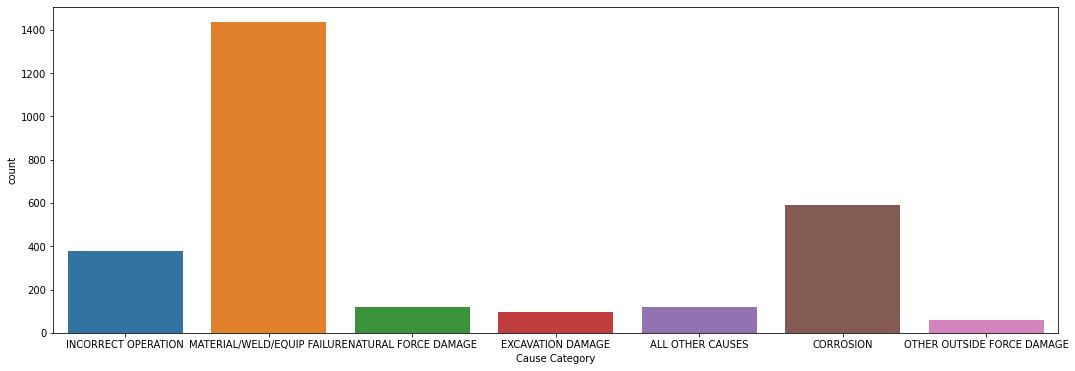

In [ ]:
plt.figure(figsize = (18, 6))
sns.countplot(x = 'Cause Category', data = df)

OBS: Material/Equipment failure lead to highest no. of accidents

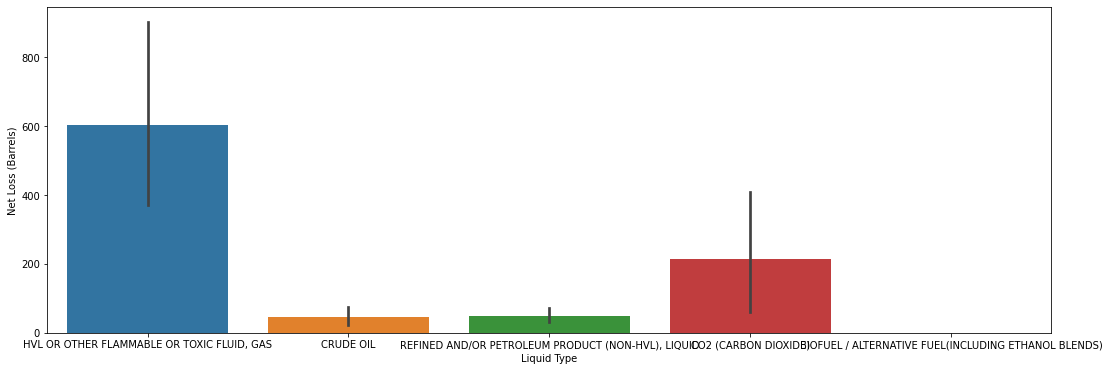

In [ ]:
plt.figure(figsize = (18, 6))
sns.barplot(x = 'Liquid Type', y = 'Net Loss (Barrels)', data = df )

OBS: Highest amt of liq was lost in pipeline containing HVL/Other flammable/toxic fluid

Compare below with sns

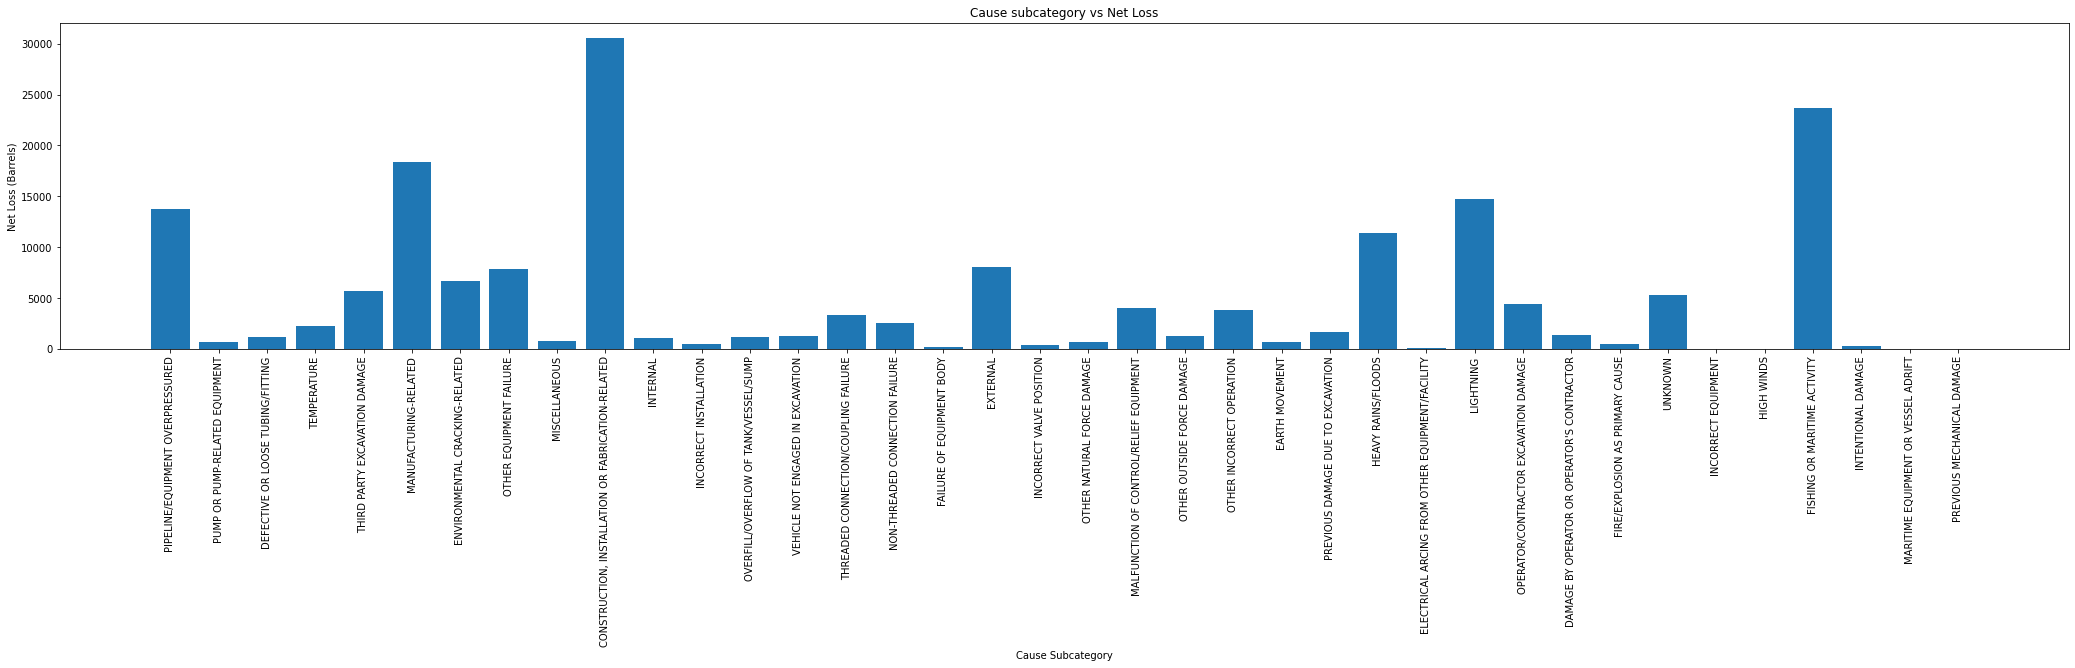

In [ ]:
plt.figure(figsize = (36, 6))
plt.bar(df['Cause Subcategory'], df['Net Loss (Barrels)'])
plt.title('Cause subcategory vs Net Loss')
plt.xlabel('Cause Subcategory')
plt.xticks(rotation = 90)
plt.ylabel('Net Loss (Barrels)')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text major ticklabel objects>)

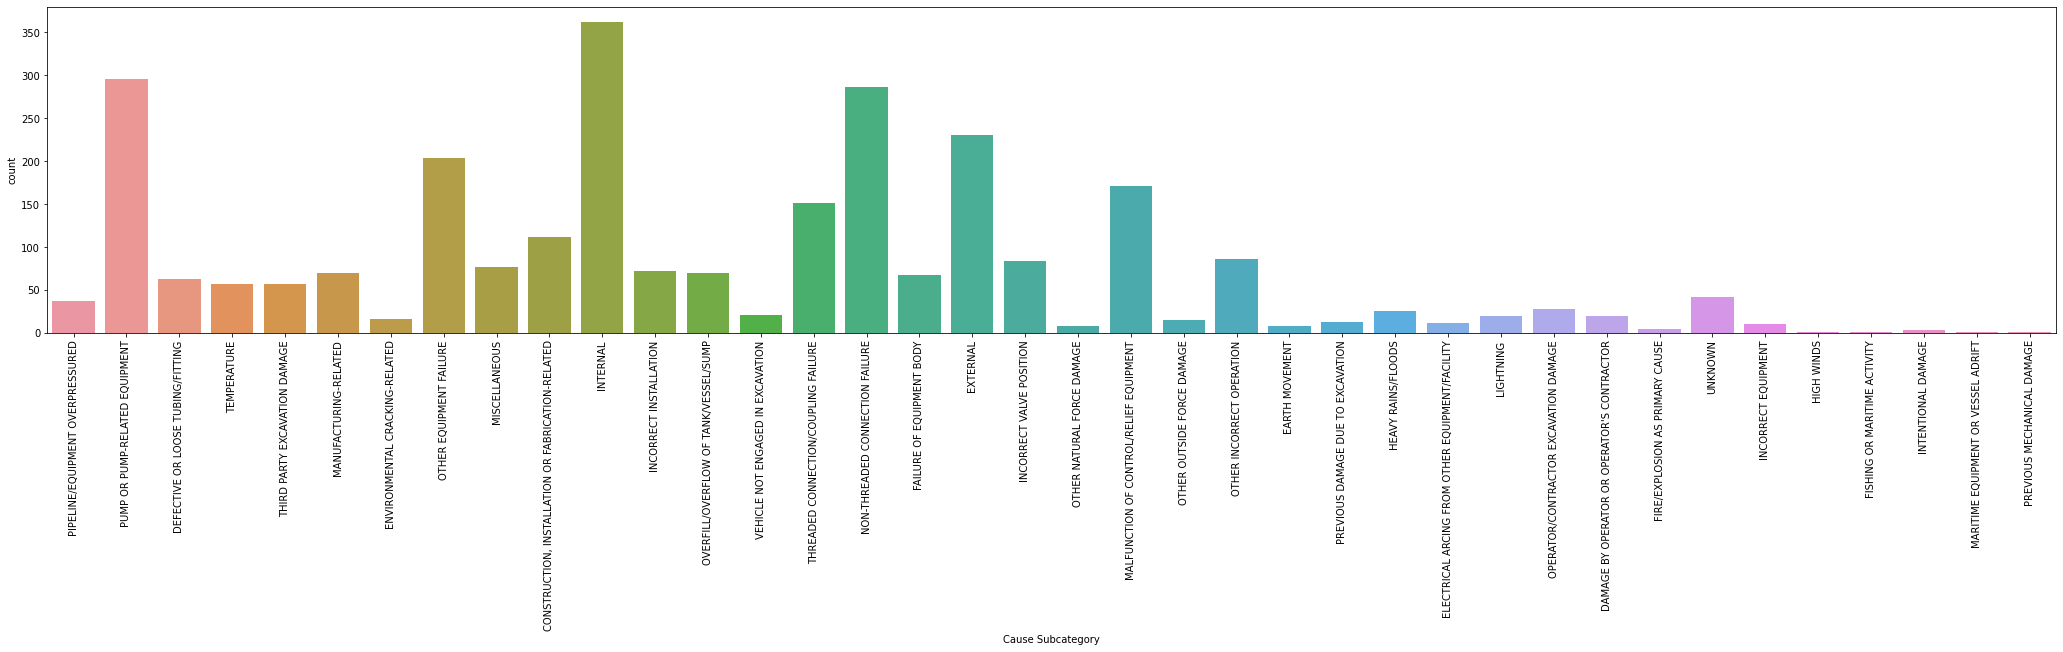

In [ ]:
plt.figure(figsize = (36, 6))
sns.countplot(x = 'Cause Subcategory', data =df)
plt.xticks(rotation = 90)

OBS: Highest no. of accidents was due to internal?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text major ticklabel objects>)

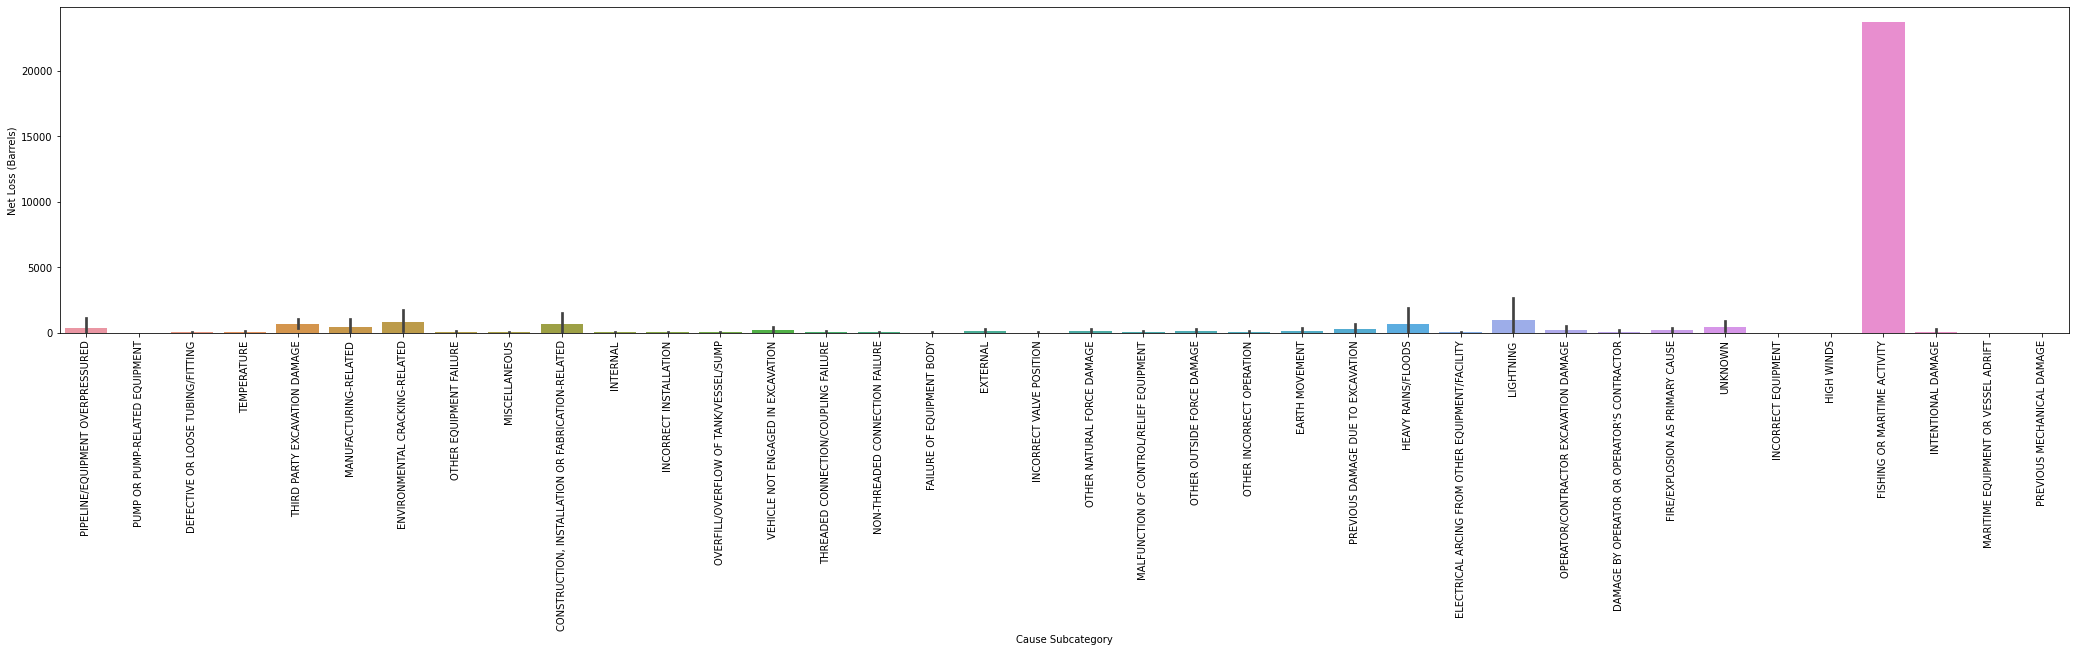

In [ ]:
plt.figure(figsize = (36, 6))
sns.barplot(x = 'Cause Subcategory', y = 'Net Loss (Barrels)', data =df)
plt.xticks(rotation = 90)

OBS: Highest loss of liquid was due to Fishing or Marine Activity

Plot of Start vs Shut of disaster

In [ ]:
df['Restart Date/Time'].isnull().sum()

In [ ]:
df['Shutdown Date/Time'].isnull().sum()